In [1]:
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.optimizers import Adam
from keras.layers import Flatten
from keras.layers import Dense,Dropout
import matplotlib.pyplot as plt
import os


In [2]:
# Directory with training dermatitis pictures
traindermatitis = os.path.join('/content/drive/MyDrive/Proyect/dermatitis psoriasis train/dermatitis')

# Directory with training psoriasis pictures
trainpsoriasis = os.path.join('/content/drive/MyDrive/Proyect/dermatitis psoriasis train/psoriasis')

# Directory with validation dermatitis pictures
valdermatitis = os.path.join('/content/drive/MyDrive/Proyect/dermatitis psoriasis test/dermatitis')

# Directory with validation psoriasis pictures
valpsoriasis = os.path.join('/content/drive/MyDrive/Proyect/dermatitis psoriasis test/psoriasis')

In [3]:
print(f'total training dermatitis images: {len(os.listdir(traindermatitis))}')
print(f'total training psoriasis images: {len(os.listdir(trainpsoriasis))}')
print(f'total validation dermatitis images: {len(os.listdir(valdermatitis))}')
print(f'total validation psoriasis images: {len(os.listdir(valpsoriasis))}')

total training dermatitis images: 1042
total training psoriasis images: 922
total validation dermatitis images: 177
total validation psoriasis images: 171


In [4]:
from keras.preprocessing.image import ImageDataGenerator

# Apply data augmentation
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
      rotation_range=45,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(preprocessing_function=preprocess_input, rescale=1./155)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/Proyect/dermatitis psoriasis train',  # This is the source directory for training images
        target_size=(224, 224),  # All images will be resized
        batch_size=64,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        '/content/drive/MyDrive/Proyect/dermatitis psoriasis test',  # This is the source directory for training images
        target_size=(224, 224),  # All images will be resized
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

Found 1964 images belonging to 2 classes.
Found 348 images belonging to 2 classes.


In [5]:
vvg = VGG16(input_shape=(224,224, 3), include_top=False,weights = 'imagenet')

58889256/58889256 [==============================] - 0s 0us/step


In [6]:
for layers in (vvg.layers):
    layers.trainable = False

In [7]:
vvg.layers

In [8]:
import tensorflow as tf

model = Sequential()
model.add(vvg)

# Add new layers
model.add(Flatten())
model.add(Dense(4096 , activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096 , activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer = Adam(learning_rate=0.0001),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 4096)              102764544 
                                                                 
 dropout (Dropout)           (None, 4096)              0         
                                                                 
 dense_1 (Dense)             (None, 4096)              16781312  
                                                                 
 dropout_1 (Dropout)         (None, 4096)              0         
                                                                 
 dense_2 (Dense)             (None, 4096)              1

In [10]:
history = model.fit(
      train_generator,
      steps_per_epoch=30,
      epochs=20,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=11)

Epoch 1/20
30/30 [==============================] - 1401s 46s/step - loss: 9.0549 - accuracy: 0.5247 - val_loss: 0.6828 - val_accuracy: 0.5287
Epoch 2/20
30/30 [==============================] - 1382s 46s/step - loss: 1.8726 - accuracy: 0.6137 - val_loss: 0.7011 - val_accuracy: 0.5086
Epoch 3/20
30/30 [==============================] - 1378s 46s/step - loss: 1.6918 - accuracy: 0.6468 - val_loss: 0.7021 - val_accuracy: 0.5086
Epoch 4/20
30/30 [==============================] - 1369s 46s/step - loss: 1.6820 - accuracy: 0.6484 - val_loss: 0.6912 - val_accuracy: 0.5115
Epoch 5/20
30/30 [==============================] - 1375s 46s/step - loss: 1.4678 - accuracy: 0.6853 - val_loss: 0.6782 - val_accuracy: 0.5345
Epoch 6/20
30/30 [==============================] - 1372s 46s/step - loss: 1.3248 - accuracy: 0.6895 - val_loss: 0.6792 - val_accuracy: 0.5374
Epoch 7/20
30/30 [==============================] - 1376s 46s/step - loss: 1.3141 - accuracy: 0.6811 - val_loss: 0.6742 - val_accuracy: 0.5517

In [ ]:
import torch
torch.save(model, "/content/drive/MyDrive/Proyect/vgg16model.pth")

In [13]:
model.save('vgg16', save_format='tf')

# Mover el modelo guardado a Google Drive
!mv vgg16 /content/gdrive/My\ Drive/

mv: cannot stat 'mi_modelo': No such file or directory


In [12]:
model.save('/content/gdrive/My Drive/modelovgg16.keras')

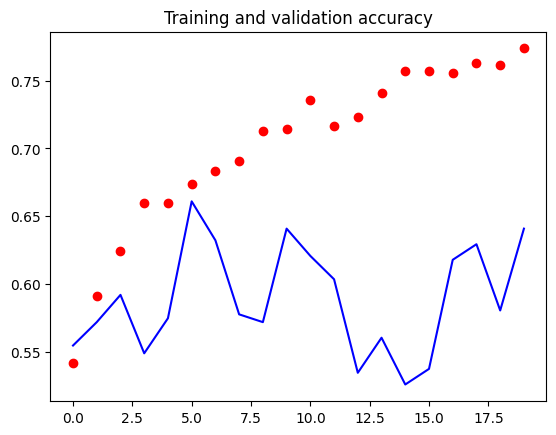

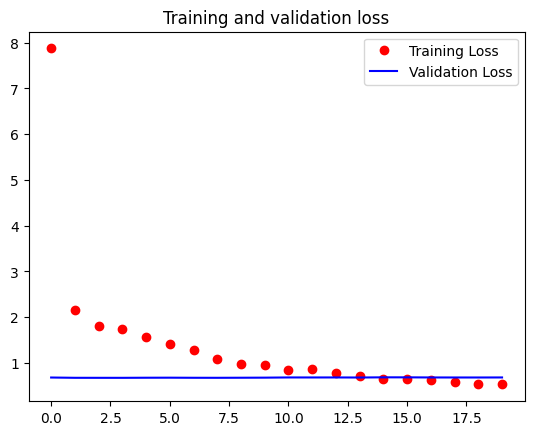

In [ ]:
##Curvas de validación y trainning accuracy
import matplotlib.pyplot as plt

def plot_loss_acc(history):
  '''Plots the training and validation loss and accuracy from a history object'''
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'ro', label='Training accuracy')
  plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
  plt.title('Training and validation accuracy')

  plt.figure()

  plt.plot(epochs, loss, 'ro', label='Training Loss')
  plt.plot(epochs, val_loss, 'b', label='Validation Loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()
  # Plot training results
plot_loss_acc(history)

In [ ]:
import numpy as np
import keras.utils as image
img_size = (224, 224)
img = image.load_img('/content/derm (40).jpg', target_size=img_size)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])

In [ ]:
images

array([[[[190., 236., 233.],
         [190., 236., 233.],
         [152., 155., 148.],
         ...,
         [242., 157., 136.],
         [255., 160., 102.],
         [255., 160., 102.]],

        [[190., 236., 233.],
         [190., 236., 233.],
         [152., 155., 148.],
         ...,
         [242., 157., 136.],
         [255., 160., 102.],
         [255., 160., 102.]],

        [[190., 236., 233.],
         [190., 236., 233.],
         [152., 155., 148.],
         ...,
         [242., 157., 136.],
         [255., 160., 102.],
         [255., 160., 102.]],

        ...,

        [[172., 223., 216.],
         [172., 223., 216.],
         [173., 226., 218.],
         ...,
         [ 98., 118., 106.],
         [ 98., 120., 108.],
         [ 98., 120., 108.]],

        [[172., 223., 216.],
         [172., 223., 216.],
         [173., 226., 218.],
         ...,
         [ 98., 118., 106.],
         [ 98., 120., 108.],
         [ 98., 120., 108.]],

        [[172., 223., 216.],
       

In [ ]:
y_proba=model.predict(images)
y_proba

1/1 [==============================] - 1s 519ms/step


array([[0.48974505, 0.510255  ]], dtype=float32)